# Long Call Option

### I. Strategy Overview

#### Payoff

![](long_call.jpg)

#### Features:
* Long Delta: option value increases as the underlying price goes up
* Long volatility: option value increases as the implied volatility hikes
* Short Theta: option value decreases as time decays

### II. Strategy Setup

In [1]:
import sys  
sys.path.insert(0, 'C:\\Users\\chena\\Desktop\\Trading\\StrategicOptions\\')
import datetime
from mainprg_backtest import OptionBackTesting, BackTestingVisualization

####  1. Input symbol of underlying

In [2]:
Ticker = 'MSFT'

#### 2. Specify testing period and find out the expiration dates within

In [3]:
Start_Date = datetime.datetime(2017, 6, 1)
End_Date = datetime.datetime(2017, 10, 31)

expiry = OptionBackTesting(Ticker, [], [], Start_Date, End_Date,  []).set_expiration_calendar()
print(expiry)

               Business Day Day of the Week Year-Month
0 2017-06-16 00:00:00+00:00          Friday    2017-06
1 2017-07-21 00:00:00+00:00          Friday    2017-07
2 2017-08-18 00:00:00+00:00          Friday    2017-08
3 2017-09-15 00:00:00+00:00          Friday    2017-09
4 2017-10-20 00:00:00+00:00          Friday    2017-10


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


#### 3. Select an expiration date

In [4]:
expiration = datetime.datetime(2017, 9, 15)

#### 4. Choose option enter and exit date

In [5]:
entry_date = datetime.datetime(2017, 8, 9)
exit_date = datetime.datetime(2017, 9, 10)

#### 5. Option Type & Strike Price Selection
* Modify the strike value to see how it affect the strategy

In [6]:
option_type = 'C'
strike_price = 72  # At the money

# strike_price = 65  # Deep in the money
# strike_price = 80  # Far out of the money

### III. Visualization
#### 1. Generate options basic data

In [7]:
option_data = OptionBackTesting(Ticker, strike_price, [], entry_date, exit_date, option_type)
option_price, option_return, underlying_price, underlying_return, trading_days, iv, hv = option_data.generate_data()

##### 2. Speficy spot price range and generate payoff chart

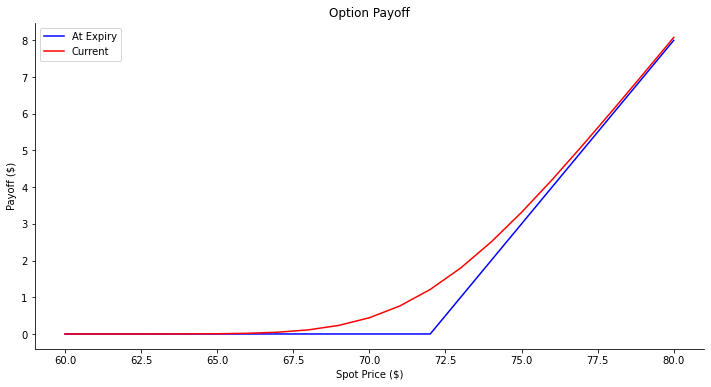

In [8]:
lower_limit = 60 # Modify to customize the lower bound of x-axis
upper_limit = 80 # Modify to customize the upper bound of x-axis

# Generate payoffs
payoff_calc = BackTestingVisualization([],[],[],[],[],iv, strike_price, expiration, entry_date, lower_limit, upper_limit, 'C')
payoff_calc.plot_payoff()


#### 3. Price Moves and Returns

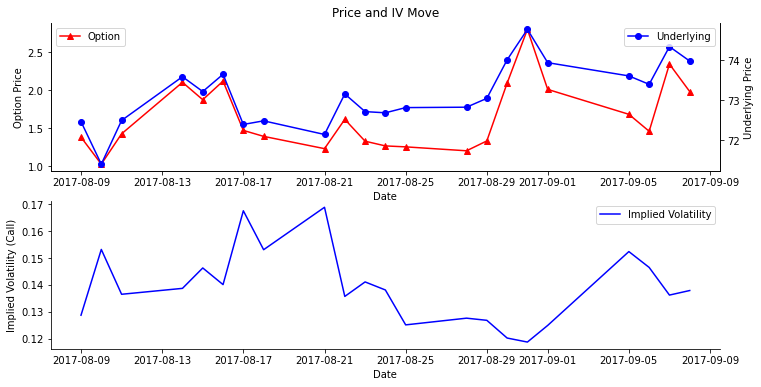

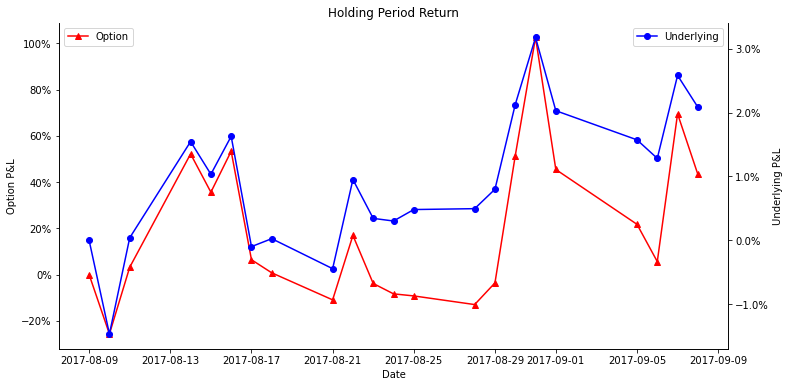

In [9]:
viz = BackTestingVisualization(trading_days, option_price, underlying_price, option_return, underlying_return, iv,[],[],[],[],[],[])
viz.plot_price_history()
viz.plot_option_pnl()

### Synthesis & Conclusion

In [14]:
#### Cost, duration, risk-return, etc